In [23]:
from torch import optim
import networkx as nx
import matplotlib.pyplot as plt
from pykeen.triples import TriplesFactory
import pandas as pd
from pykeen.training.callbacks import TrainingCallback
import importlib
import machine_learning

importlib.reload(machine_learning)

<module 'machine_learning' from '/Users/chrisdefra/Documents/oxford/KGS/c73f8a33-88eb-4884-842f-456da3be9123/assignment/machine_learning.py'>

In [24]:
triples_df = pd.read_csv('./data/csvs/triples.csv/part-00000-58e2c5f0-1d2a-4863-8450-cc108a413777-c000.csv')

triples_df

from                edge                 to
0     Normal Blood Pressure  healthyPhenotypeOf               4955
1     Normal Blood Pressure  healthyPhenotypeOf                939
2     Normal Blood Pressure  healthyPhenotypeOf                235
3     Normal Blood Pressure  healthyPhenotypeOf                115
4     Normal Blood Pressure  healthyPhenotypeOf                487
...                     ...                 ...                ...
2216                    289  hasCortisolFeature     upperTailNight
2217                    845  hasCortisolFeature     upperTailNight
2218                   5121  hasCortisolFeature     upperTailNight
2219                   5005  hasCortisolFeature  upperTailPeakTime
2220                    427  hasCortisolFeature     upperTailNight

[2221 rows x 3 columns]

In [25]:
entity_counts = pd.concat([triples_df['from'], triples_df['to']]).value_counts()
print(f"Average degree: {entity_counts.mean():.2f}")

Average degree: 17.70


In [26]:
triples_factory = TriplesFactory.from_labeled_triples(triples=triples_df[['from','edge','to']].values)

In [27]:
training, testing, validation = triples_factory.split([.8, .1, .1])
triples_factory

using automatically assigned random_state=2136758367


TriplesFactory(num_entities=251, num_relations=3, create_inverse_triples=False, num_triples=2221)

In [28]:
print(machine_learning.summarise_triples_factory(training, testing, validation))

                         Entities  Relations  Triples
Risk to Feature Mapping                              
Training                      251          3     1776
Testing                       251          3      222
Validation                    251          3      223


In [29]:
all_triples = list(training.triples) + list(testing.triples) + list(validation.triples)
graph_triples, _ = triples_factory.split([.2,.8])

Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
using automatically assigned random_state=1118053198


## Visualise the triples as a graph

We are going to use Nx to construct the full directed graph and visualise it.  Note, as there are so many relationships, it is advisable to use a smaller sample of the triples to visualise, otherwise it will be too cluttered.

Reconstructing all label-based triples. This is expensive and rarely needed.


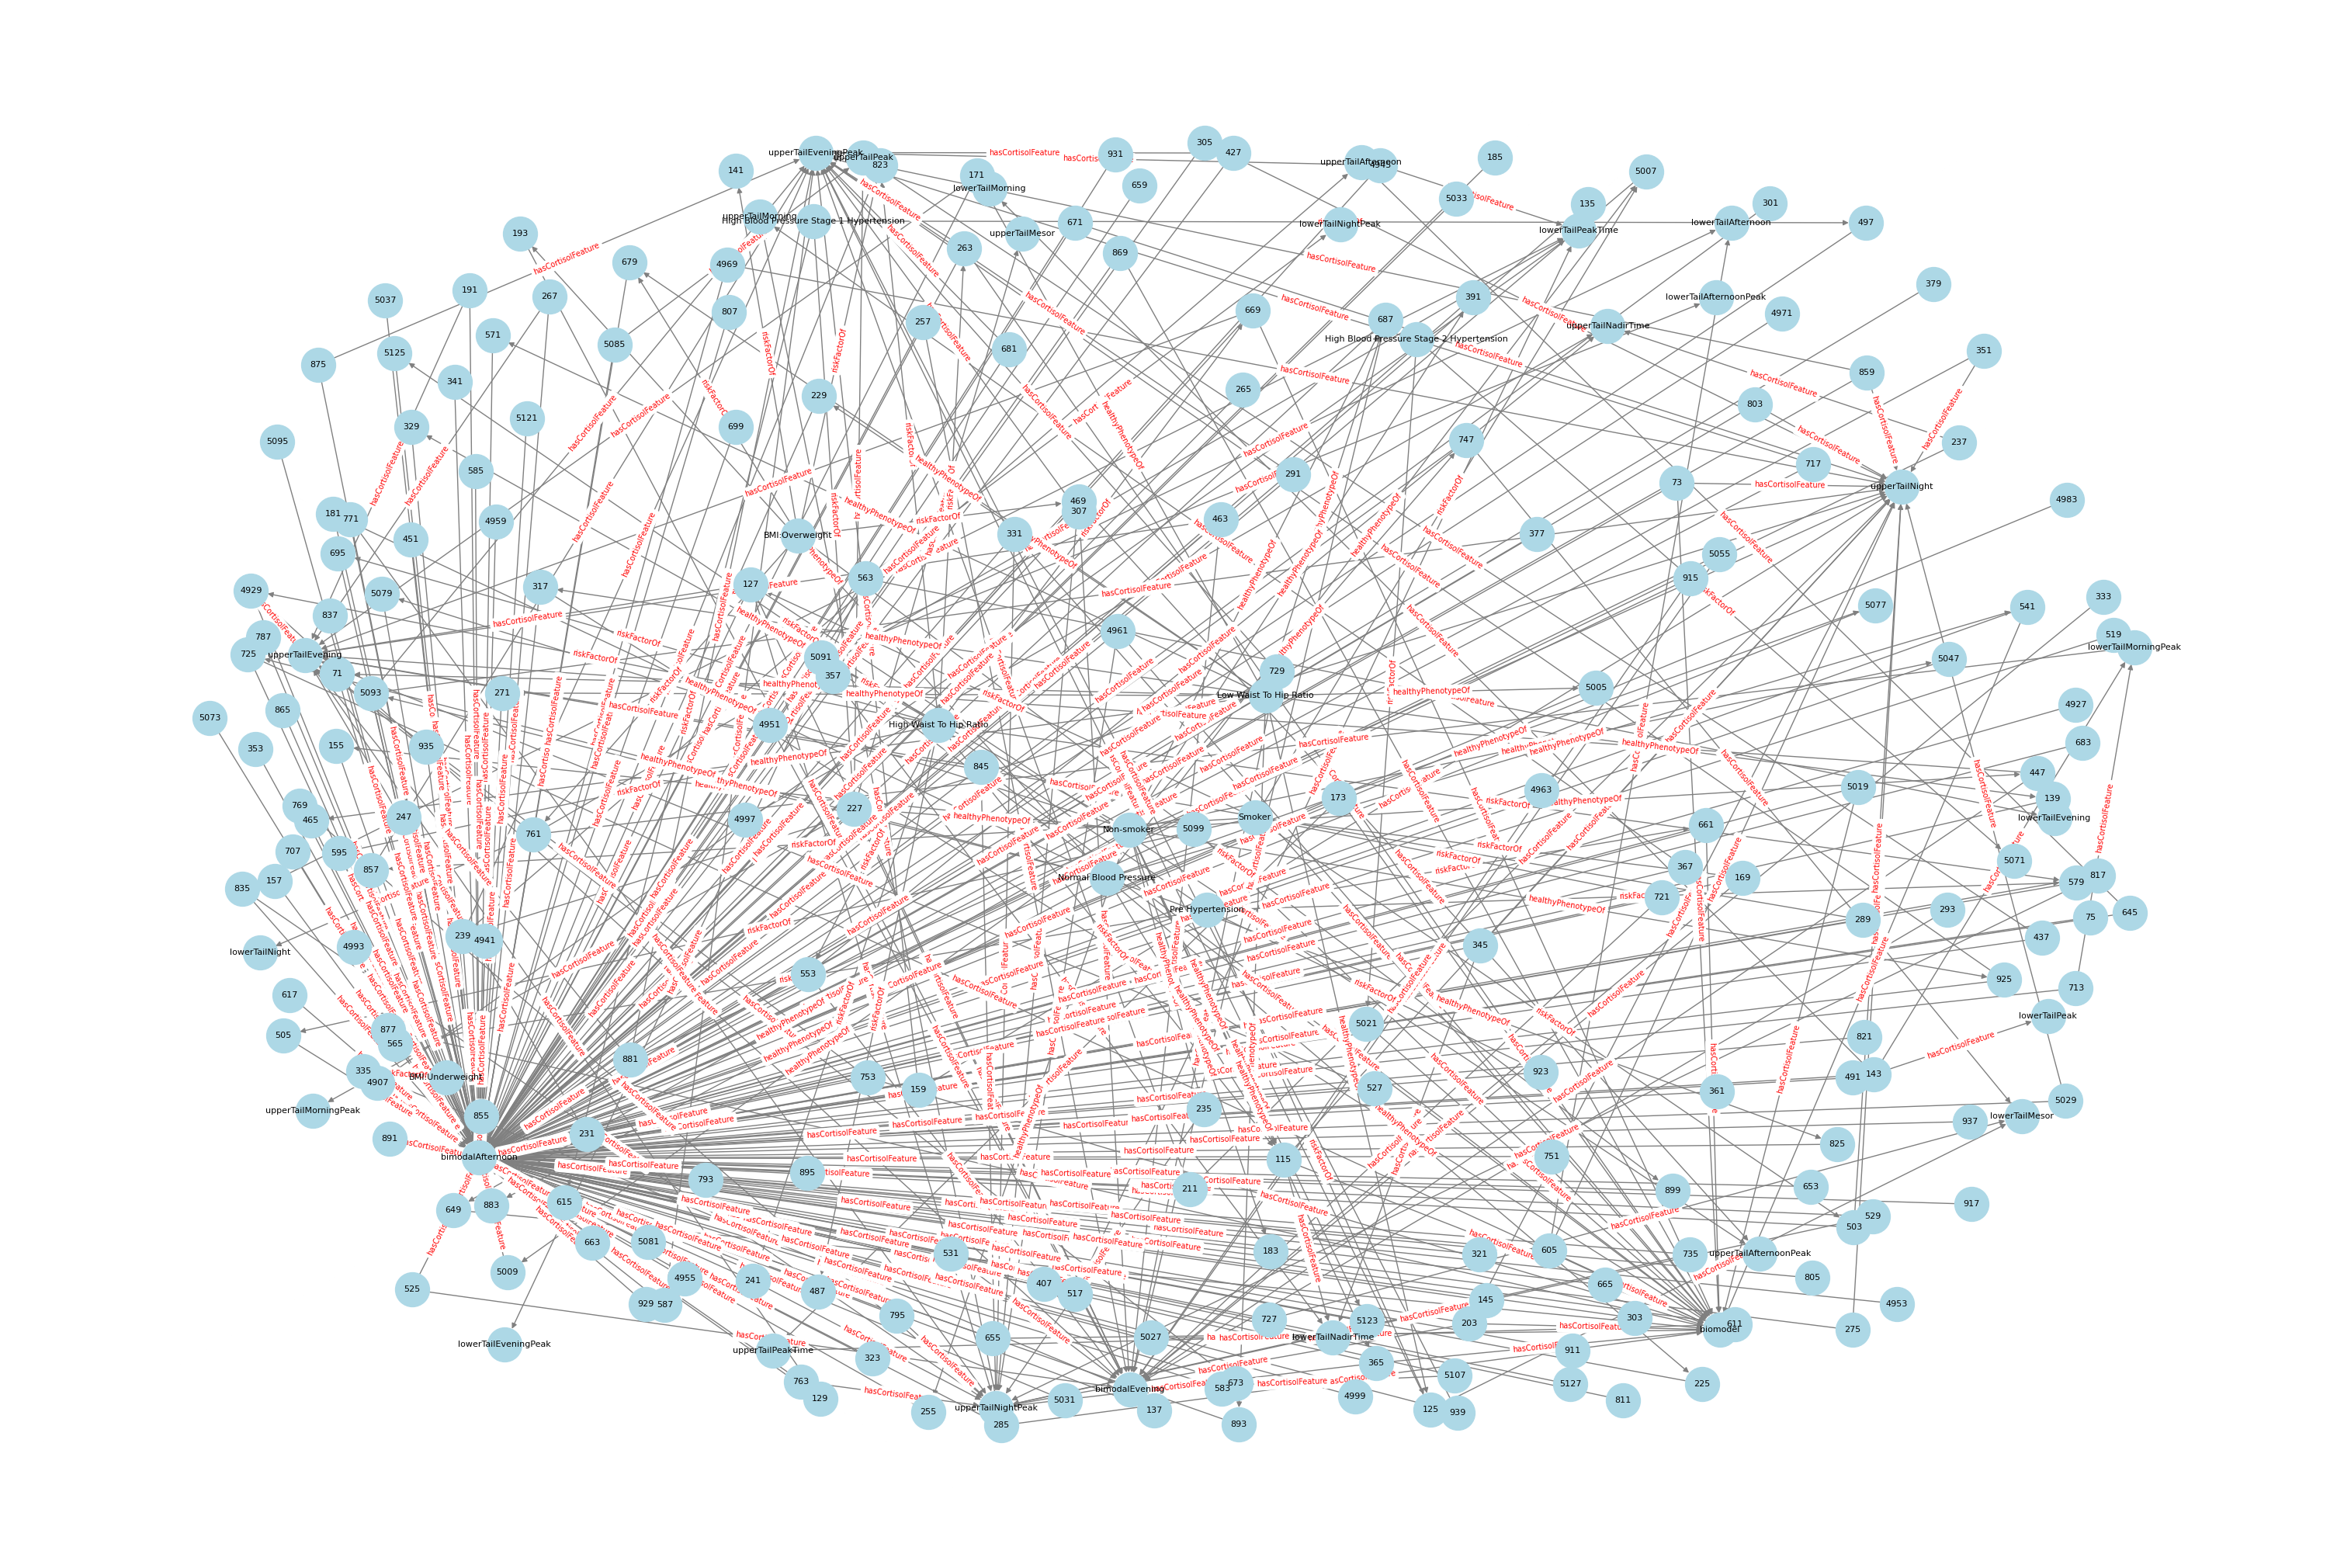

In [30]:
G = nx.DiGraph()

for subj, pred, obj in graph_triples.triples:
    G.add_edge(subj, obj, label=pred)

pos = nx.spring_layout(G, k=0.5, iterations=25)

plt.figure(figsize=(30, 20))  # Width, Height in inches

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=8)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=7)

# Show the plot
plt.show()

### Drawing a subgraph

We are going to look at a subgraph of the triples now, all the persons that are in the Pre Hypertension category.

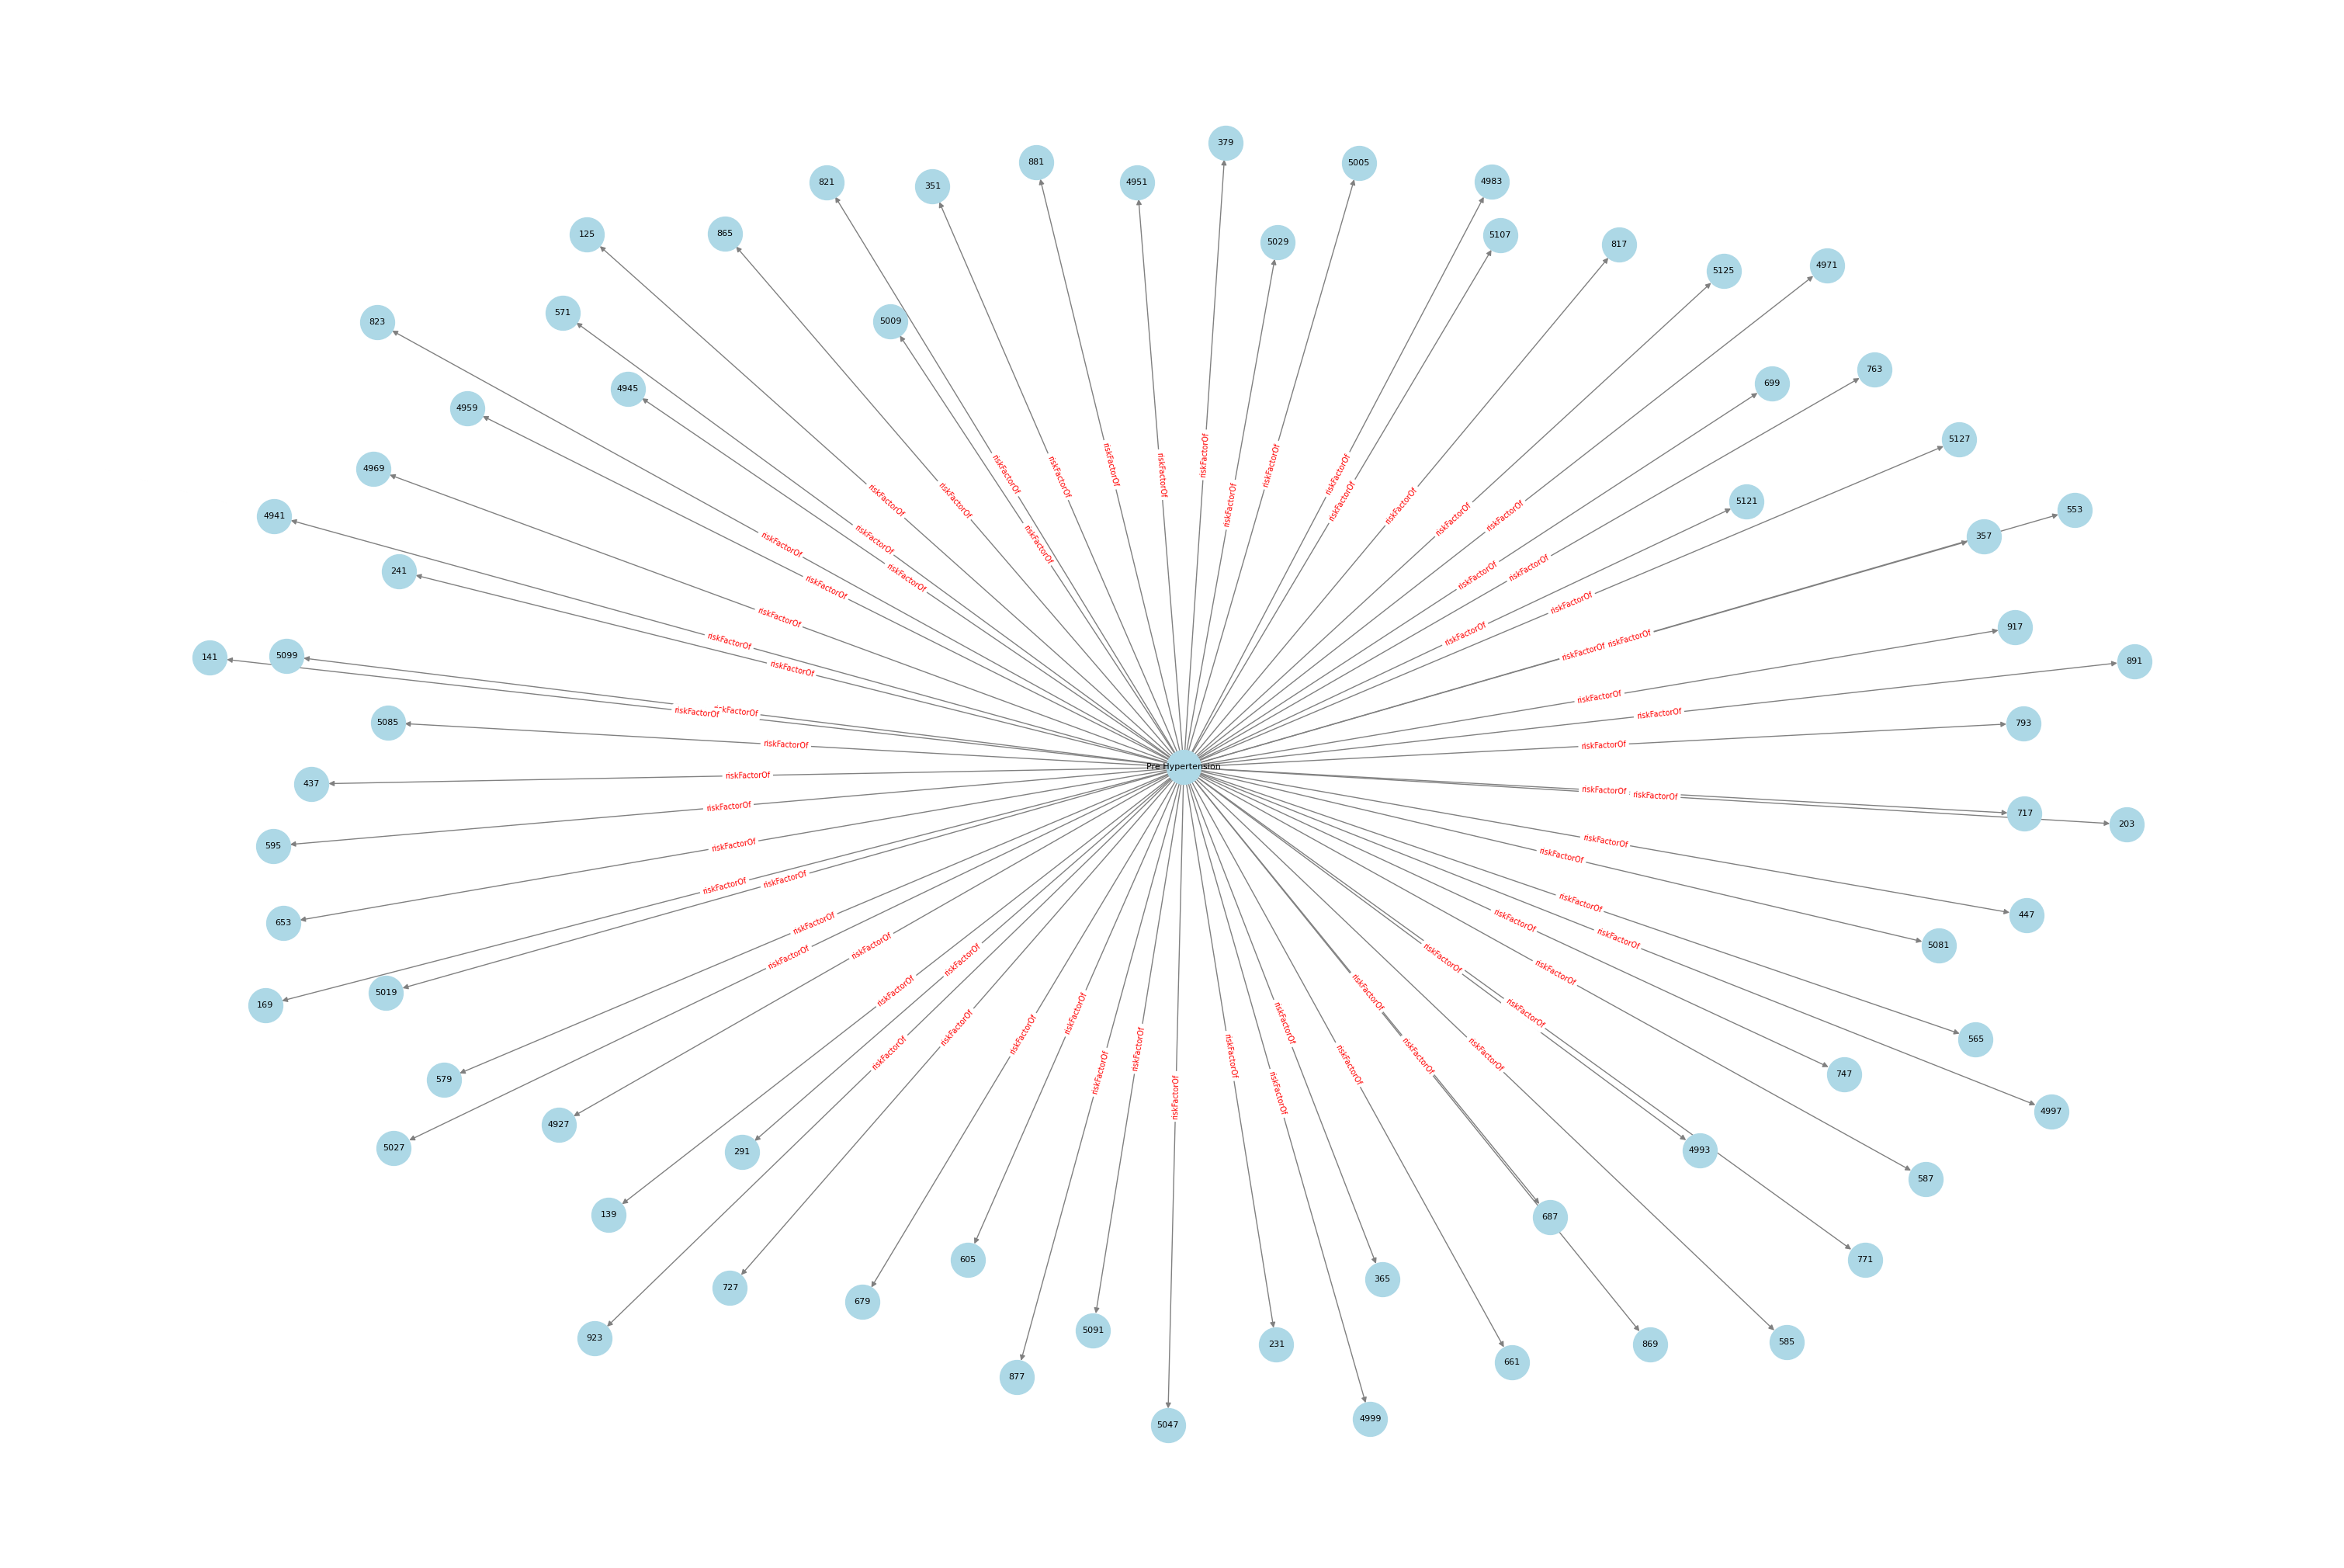

In [31]:
G = nx.DiGraph()

for subj, pred, obj in all_triples:
    if subj.startswith('Pre Hypertension'):
        G.add_edge(subj, obj, label=pred)

pos = nx.spring_layout(G, k=0.5, iterations=25)

plt.figure(figsize=(30, 20))  # Width, Height in inches

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=8)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=7)

# Show the plot
plt.show()

In [32]:
training_triples = training.mapped_triples
validation_triples = validation.mapped_triples
test_triples = testing.mapped_triples

print("Training Triples:\n", training_triples[:5])
print("Validation Triples:\n", validation_triples[:5])
print("Test Triples:\n", test_triples[:5])

training_triples = training.triples
validation_triples = validation.triples
test_triples = testing.triples

print("\n\nTraining Triples with 'Pre Hypertension' risk factor:")
for triple in training_triples:
    if triple[0] == "Pre Hypertension":
        print(triple)
print("\nValidation Triples with 'Pre Hypertension' risk factor:")
for triple in validation_triples:
    if triple[0] == "Pre Hypertension":
        print(triple)
print("\nTest Triples with 'tourism' relationship:")
for triple in test_triples:
    if triple[0] == "Pre Hypertension":
        print(triple)

Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.


Training Triples:
 tensor([[  0,   0, 224],
        [  0,   0, 226],
        [  0,   0, 234],
        [  0,   0, 247],
        [  1,   0, 231]])
Validation Triples:
 tensor([[ 10,   0, 247],
        [221,   1, 205],
        [ 36,   0, 226],
        [ 15,   0, 247],
        [220,   1, 189]])
Test Triples:
 tensor([[135,   0, 226],
        [191,   0, 241],
        [  2,   0, 247],
        [ 97,   0, 241],
        [180,   0, 226]])


Training Triples with 'Pre Hypertension' risk factor:
['Pre Hypertension' 'riskFactorOf' '125']
['Pre Hypertension' 'riskFactorOf' '5099']
['Pre Hypertension' 'riskFactorOf' '5091']
['Pre Hypertension' 'riskFactorOf' '687']
['Pre Hypertension' 'riskFactorOf' '291']
['Pre Hypertension' 'riskFactorOf' '4999']
['Pre Hypertension' 'riskFactorOf' '923']
['Pre Hypertension' 'riskFactorOf' '4927']
['Pre Hypertension' 'riskFactorOf' '869']
['Pre Hypertension' 'riskFactorOf' '605']
['Pre Hypertension' 'riskFactorOf' '717']
['Pre Hypertension' 'riskFactorOf' '203']
['P

## Training a model

Now we are going to train the embedding model

In [33]:
# from pykeen.models import TransE
from pykeen.models import TransE
from pykeen.losses import SoftplusLoss
# model = TransE(triples_factory=training, random_seed=35, embedding_dim=1000)
model = TransE(triples_factory=training, random_seed=35, embedding_dim=2000, loss=SoftplusLoss())
# , 

In [34]:
# optimizer
# optimizer=optim.Adam(params=model.get_grad_params())
optimizer = optim.SGD(params=model.get_grad_params(), lr=0.02)

In [35]:
# lets start with SLCWA.  We can use LCWA
from pykeen.training import LCWATrainingLoop
training_loop = LCWATrainingLoop(
    model=model,
    optimizer=optimizer,
    triples_factory=training,
)

/opt/anaconda3/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Training epochs on cpu:   0%|          | 0/1000 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

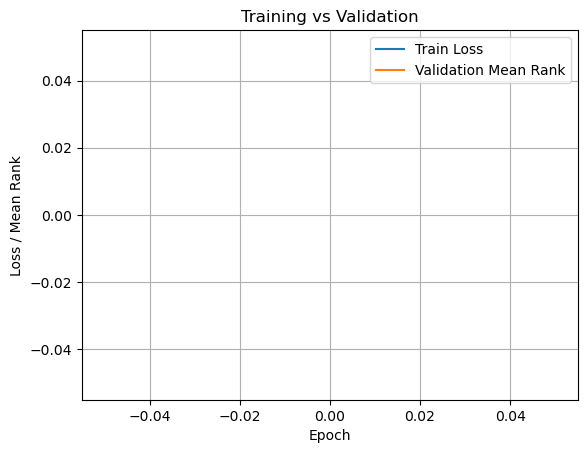

In [36]:
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()
callback = machine_learning.LossTrackingCallback(validation_triples, evaluator)

training_loop.train(
    triples_factory=training,
    num_epochs=1000,
    batch_size=256,
    callbacks=[callback],
    callbacks_kwargs=dict(
        prefix='validation',
        factory=validation,
    ),
)

plt.plot(callback.train_losses, label='Train Loss')
plt.plot(callback.val_ranks, label='Validation Mean Rank')
plt.xlabel('Epoch')
plt.ylabel('Loss / Mean Rank')
plt.title('Training vs Validation')
plt.legend()
plt.grid(True)
plt.show()

## Evaluating the model 

In [37]:
head_id = training.entity_to_id['Pre Hypertension']
head_id

222

In [38]:
validation.mapped_triples

tensor([[ 10,   0, 247],
        [221,   1, 205],
        [ 36,   0, 226],
        [ 15,   0, 247],
        [220,   1, 189],
        [222,   2, 132],
        [ 13,   0, 225],
        [ 97,   0, 246],
        [220,   1,  95],
        [222,   2, 112],
        [118,   0, 247],
        [ 86,   0, 242],
        [ 85,   0, 226],
        [142,   0, 248],
        [164,   0, 225],
        [222,   2,  63],
        [130,   0, 232],
        [ 97,   0, 248],
        [220,   1, 161],
        [219,   1, 212],
        [218,   2, 129],
        [187,   0, 242],
        [176,   0, 248],
        [ 52,   0, 226],
        [220,   1, 114],
        [148,   0, 244],
        [219,   1, 176],
        [ 33,   0, 225],
        [220,   1,  87],
        [ 63,   0, 248],
        [148,   0, 249],
        [109,   0, 226],
        [ 64,   0, 242],
        [218,   2,  36],
        [103,   0, 226],
        [221,   1, 134],
        [ 84,   0, 247],
        [209,   0, 247],
        [104,   0, 225],
        [220,   1, 104],


In [39]:
# Pick an evaluator
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()

mapped_triples_validation = validation.mapped_triples
validation_results = evaluator.evaluate(model,
                                        mapped_triples_validation,
                                        batch_size=64)
print("Validation Results:\n", validation_results)

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]



Evaluating on cpu:   0%|          | 0.00/223 [00:00<?, ?triple/s]

Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).


Validation Results:


In [40]:
validation_results.get_metric('mean_rank')

86.2511215209961